# This is a data story telling project using visualizations. The data set being used has been pre-processed from the original data set which contains the information on the housing properties in the city of Burlington. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
df = pd.read_csv('Property_2018.12.4.csv')
df.head()

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,YearBlt,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint_x,PropertyCenterPoint_y
0,1004,69,32,5176,0.05597,1760,840.00000,152500.0,121600,0,...,1912,158000,5,2,1,1733,2628,0.359,-73.2122,44.46910
1,1005,25,21,5176,0.08242,2676,1436.00000,241900.0,94400,700,...,1899,231750,7,3,1,1733,2628,0.098,-73.2125,44.48854
2,1006,133,137,2150,0.00000,2184,1572.80005,268000.0,0,0,...,1986,381500,6,2,1,5042,1219,0.025,-73.2681,44.52157
3,1007,14,10,5176,0.09832,3699,2087.00000,340800.0,130100,0,...,1910,430000,8,4,1,5042,2628,0.174,-73.2051,44.48153
4,1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,...,2013,505683,103,53,26,1733,1219,0.000,-73.2258,44.48770


## Except the FID, each other feature contains some information on the corresponding housing properties. Recall from the data cleaning process, we have already found some relationships among features as listed below.
### 1.CurrentValue = CurrentLandValue+CurrentYardItemsValue+CurrentBuildingValue.
### 2.TotalGrossArea is proportional to FinishedArea.
### 3.SalePrice is proportional to CurrentValue.
## Besides the above basic relationships, the following question is important.
# How does each feature affect SalePrice or CurrentValue?
## We will explore the relationships between various features and the CurrentValue and answer the main question above in a case-by-case manner. The features we will investigate includes: 'LandUse', 'YearBlt', 'Foundation', 'BuildingType', 'ZoningCode'. Even though the 'ZoningCode' gives a prelimary analysis on the effect of location to CurrentValue. A heatmap is used to better visualize the relationship between location and CurrentValue. Features 'PropertyCenterPoint_x' and 'PropertyCenterPoint_y' are used in the heatmap.

## The following barplot shows the relationship between LandUse and CurrentValue. As can be seen from the bar chart, the effects of different types of land use on the average current  values of housing properties are not the same. LandUse '367' = 'Apartments 5+Units' has relatively high CurrentValue. LandUse '8' = 'Mobile Home w/Land', '45' = 'Seasonal home', '117' = 'Mobile Home' have relatively low CurrentValues. We can refer to the dictionary of LandUse types to check what each number in LandUse represent.

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


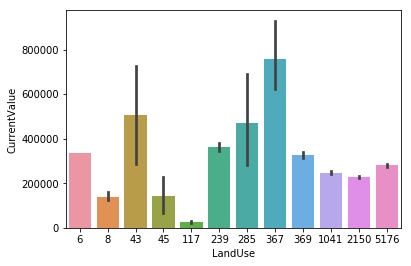

In [3]:
ax = sns.barplot(x="LandUse", y="CurrentValue", data=df)

In [4]:
## The code to convert the original categorical data in LandUse to numerics. The results serve as a dictionary for LandUse types.
##LandUseCode = df['LandUse'].value_counts().to_dict()
##LandUseCode
##{'Single Family': 5176,
## 'Residential Condo': 2150,
## '2 Family': 1041,
## '3 Family': 369,
## 'Apartments 5+Units': 367,
## 'Commercial': 299,
## 'Exempt': 285,
## '4 Family': 239,
## 'Res. Vacant Land': 235,
## 'Commercial and Residential': 158,
## 'Mobile Home': 117,
## 'Exempt Land': 112,
## 'Commercial Condo': 91,
## 'Seasonal home': 45,
## 'Partial Exempt': 43,
## 'Commercial Land': 34,
## 'Industrial': 22,
## 'Exempt Utility': 11,
## 'Mobile Home w/Land': 8,
## 'Farmland': 6,
## 'RESIDENTAL APT CONDO': 6,
## 'Utility Electric': 4,
## 'Industrial Land': 3,
## 'Utility Other': 3,
## 'Farm': 2,
## 'Commercial/Residential Condo': 1}


## We would also like to see the relative total values of housing properties associated to various land use types. The pie chart below serves this purpose. We can see from the pie chart that 'Single Family'=5176 has the highest total current value, and takes up almost half of the total housing values in the city's housing market. Following up is 'Residential Condo' = 2150 which takes up to about 1/4 of the total housing values in the city's housing market.

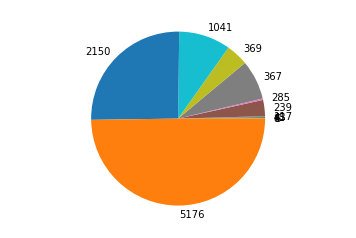

In [5]:
sums = df.CurrentValue.groupby(df.LandUse).sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index);
plt.show()

## The following scatter plot shows that most of housing properties are built after 1900 and have current values of less than 1000000.

Text(0,0.5,'CurrentValue')

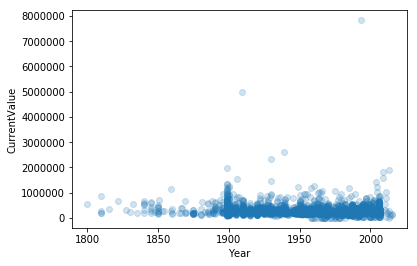

In [6]:
plt.scatter(df.YearBlt, df.CurrentValue, alpha=0.2)
plt.xlabel('Year')
plt.ylabel('CurrentValue')

## We can zoom in to invesitigate the relationship between YearBlt and CurrentValue further by getting rid of the data with current values >=1000000 and make a new scatter plot. As can be seen from the scatter plot below, a large portion of housing properties are valued from 200000 to 400000. The average current value of housing properties built around 1950 tends to be lower than that of 1900 and 2000. The current values of housing properties built in the middle of the 20th century concentrates around 200000 to 300000.

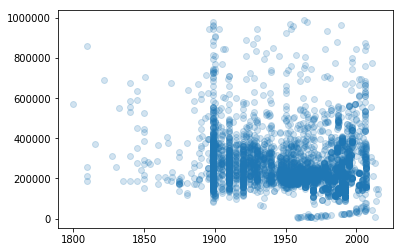

In [7]:
plt.scatter(df[df.CurrentValue<1000000].YearBlt, df[df.CurrentValue<1000000].CurrentValue, alpha=0.2)
plt.show()

## The above scatter plot suggests that the average current value of housing properties built in the middle of the 20th century tends to be lower than that of the start and the end of the 20th century.
## The actual average current value of housing properties associated to each built year is calculated. A time series plot shows the relationship between average housing values and the age of housing properties. 
## Warning: the following time series plot should not be confused with the history of housing market prices!

Text(0,0.5,'AvgCurrentValue')

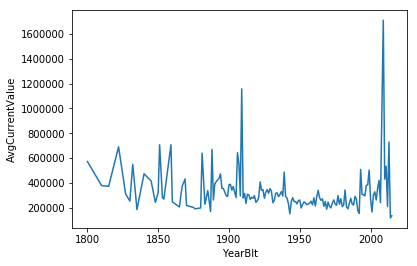

In [8]:
df_sort_year_built = df.sort_values(['YearBlt'])
mean = df_sort_year_built.CurrentValue.groupby(df_sort_year_built.YearBlt).mean()
plt.plot(mean)
plt.xlabel('YearBlt')
plt.ylabel('AvgCurrentValue')

## We can also use the total current values to generate a time series plot.

Text(0,0.5,'TotalCurrentValue')

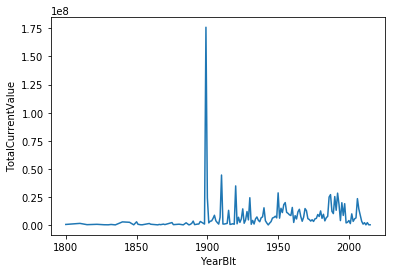

In [9]:
df_sort_year_built = df.sort_values(['YearBlt'])
total = df_sort_year_built.CurrentValue.groupby(df_sort_year_built.YearBlt).sum()
plt.plot(total)
plt.xlabel('YearBlt')
plt.ylabel('TotalCurrentValue')

## The time series plot of TotalCurrentValue V.S. YearBlt shows the housing properties built at the beginning of the 20th century have the highest total value, which is also outstanding compared to those of other BltYears.  

## We would like to see the number of housing properties built within each year. To do this we can use the groupby method to make counts and a time series plot to visualize the plot.

In [10]:
df.groupby('YearBlt').count().reset_index().head(10)
# Every column that is not YearBlt contains the number of housing properties associated with the corresponding YearBlt

,YearBlt,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,...,Grade,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint_x,PropertyCenterPoint_y
0,1800,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1810,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,1815,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1822,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1827,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1830,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1832,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1835,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1840,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,1845,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


Text(0,0.5,'NumOfProperties')

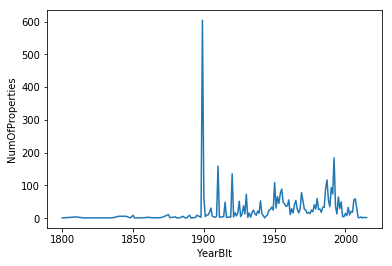

In [11]:
df_count=df.groupby('YearBlt').count().reset_index()[['FID','YearBlt']]
plt.plot(df_count.YearBlt,df_count.FID)
plt.xlabel('YearBlt')
plt.ylabel('NumOfProperties')

## Since the shape of the time series plot of 'NumOfProperties V.S. YearBlt' is similar to that of 'TotalCurrentValue V.S. YearBlt' but different from that of 'AvgCurrentValue V.S. YearBlt', the number of housing properties is large enough to dominate over the contribution of average current values to total current values in each year.
## Another observation is the average current values of housing properties built in the 19th century fluatuates a lot. It could be the historical values of some properties and the deteriation of the buildings that make the huge difference in current values. Those peaks before 1900 in 'NumOfProperties V.S. YearBlt' could indicate the great historical values of aged housing properties.

## Which foundation is the most popular?

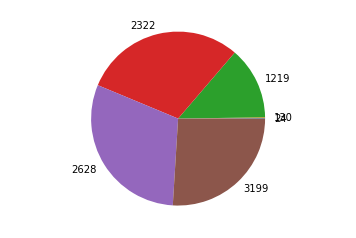

In [21]:
sums = df.CurrentValue.groupby(df.Foundation).sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index)
plt.show()

## How does each foundation type affect the CurrentValue?

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


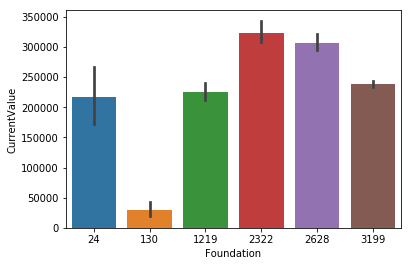

In [22]:
ax = sns.barplot(x="Foundation", y="CurrentValue", data=df)

### Recall from the datacleaning code, the following dictionary for Foundation Code is generated.
### {'CB': 3199, 'BS': 262:8, 'C': 2322, 'S': 1219, 'P': 130, 'CS': 24

## Buildings with foundation 'C' tend to have higher CurrentValue. Buildings with foundation 'P' tend to have a significantly lower CurrentValue compared to those with other foundations.

## Which Zoning Code is the most popular(have the most number of housing properties)? 

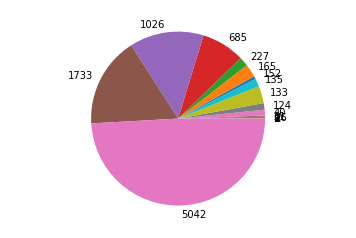

In [27]:
sums = df.CurrentValue.groupby(df.ZoningCode).sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index)
plt.show()

### Recall from the datacleaning code, we have the following dictionary for ZoningCode.

RL      5042
RM      1733
RLW     1026
RH       685
NACR     227
I        165
NAC      152
NMU      135
D        133
DT       124
DW        40
RCOC      31
RMW       26
ELM        9
RCOG       8
BST        2
RL-W       1


## ZoningCode 'RL', 'RM', 'RLW', 'RH' have the most number of housing properties. These regions might be residential areas.

## What is the average CurrentValue for each ZoningCode?

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


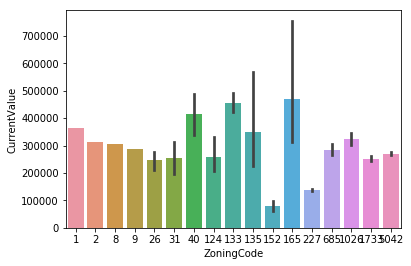

In [32]:
ax = sns.barplot(x="ZoningCode", y="CurrentValue", data=df)

### The CurrentValue does not seem to vary significantly for different Zoning Codes. 'NAC'='152', 'NACR'='227' have exceptionally low CurrentValues though.

## What is the most popular building type?

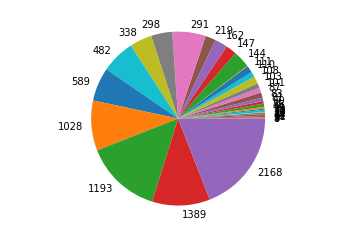

In [36]:
sums = df.CurrentValue.groupby(df.BuildingType).sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index)
plt.show()

### Recall from the data cleaning code, we have the following dictionary.

In [37]:
 ##'OLD STYLE': 2168,
 ##'RANCH': 1389,
 ##'COLONIAL': 1193,
 ##'CAPE COD': 1028,
 ##'TOWNHS END': 589,
 ##'TOWNHS INT': 482,
 ##'FLAT UP INT': 338,
 ##'MULTI-FAMLY': 298,
 ##'APARTMENTS': 291,
 ##'RAISED RANCH': 219,
 

### Among the most popular building types are 'OLD STYLE', 'RANCH', 'COLONIAL'  and 'CAPE COD'.

## What is the average CurrentValue associated with each BuildingType?

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


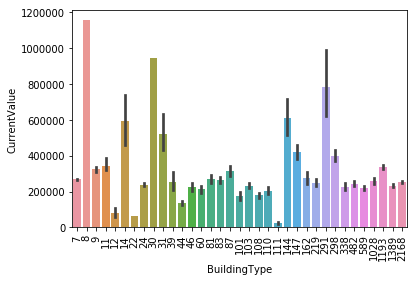

In [41]:
ax = sns.barplot(x="BuildingType", y="CurrentValue", data=df)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

### The average CurrentValues associated with differnt BuildingTypes vary a lot.BuildingType '8'='APT ELEVATOR','14'='PENTHS CONDO','ROOMNG HSE'='30','CONTEMPORARY'='144', and 'APARTMENTS'='291' have high corresponding CurrentValues. 'DOUBLE WIDE'='12','COTTAGE'='22', the combination of 'FRATS + SOR' and 'CONDO DETACH' = '11' have exceptionally low corresponding CurrentValues.

## How does location affect CurrentValue?

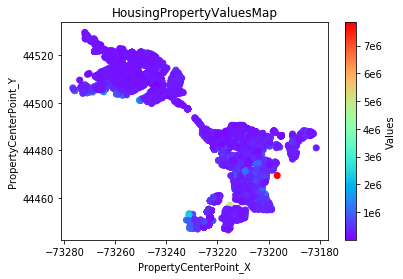

In [77]:
X = 1000*df.PropertyCenterPoint_x.values
Y = 1000*df.PropertyCenterPoint_y.values
Z = df.CurrentValue.values
#cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(X, Y, c=Z, cmap=cm)
cbar = plt.colorbar(sc)
cbar.set_label('Values')
cbar.ax.set_yticklabels(['1e6','2e6','3e6','4e6','5e6','6e6','7e6'])
plt.xlabel('PropertyCenterPoint_X')
plt.ylabel('PropertyCenterPoint_Y')
plt.title('HousingPropertyValuesMap')
plt.show()

### The above graph shows that the housing properties in the North part of the city in general have lower current values compared to those in the South. By deleting the records with CurrentValue>4000000, the graph below demonstrates the claim more visibly.

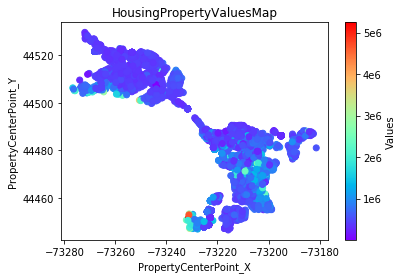

In [78]:
df_low_price = df[df.CurrentValue<=4000000]
X = 1000*df_low_price.PropertyCenterPoint_x.values
Y = 1000*df_low_price.PropertyCenterPoint_y.values
Z = df_low_price.CurrentValue.values
#cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(X, Y, c=Z, cmap=cm)
cbar = plt.colorbar(sc)
cbar.set_label('Values')
cbar.ax.set_yticklabels(['1e6','2e6','3e6','4e6','5e6','6e6','7e6'])
plt.xlabel('PropertyCenterPoint_X')
plt.ylabel('PropertyCenterPoint_Y')
plt.title('HousingPropertyValuesMap')
plt.show()

### What is the most popular grade?

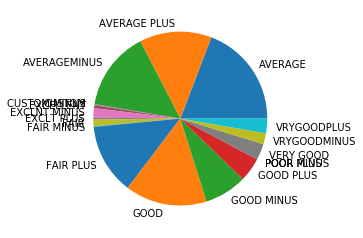

In [79]:
sums = df.CurrentValue.groupby(df.Grade).sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index)
plt.show()

### Most popular grades are 'AVERAGEMINUS', 'AVERAGE PLUS', 'AVERAGE', 'FAIR PLUS' and 'GOOD'.

### Does a higher rank of grade imply a higher CurrentValue?

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


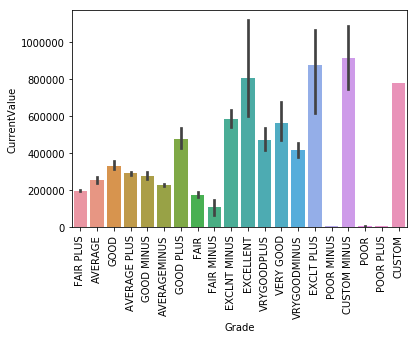

In [83]:
ax = sns.barplot(x="Grade", y="CurrentValue", data=df)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

### The above barplot offers some information but we would like to use a barplot with ascending bar lengths.

In [96]:
avgs = df.CurrentValue.groupby(df.Grade).mean().sort_values()
avgs = avgs.to_frame()
avgs = avgs.reset_index()
avgs

,Grade,CurrentValue
0,POOR,5300.000000
1,POOR MINUS,5900.000000
2,POOR PLUS,7600.000000
3,FAIR MINUS,108141.666667
4,FAIR,177029.268293
5,FAIR PLUS,198702.137004
6,AVERAGEMINUS,227673.023560
7,AVERAGE,253856.229563
8,GOOD MINUS,277537.187500
9,AVERAGE PLUS,291565.726103


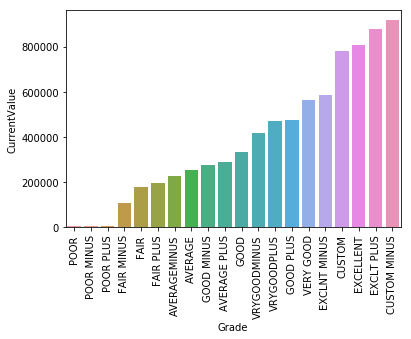

In [101]:
ax = sns.barplot(x="Grade",y="CurrentValue",data=avgs)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

### The sorted barplot shows roughly a higher rank of Grade indicates a higher CurrentValue but this relationship is not strict. One interesting fact is housing properties with the grade 'CUSTOM MINUS' have the highest average CurrentValue.

## The rest of the analysis is not as important as what have been done. It explores the distribution of StreetNames (not important since we have a map demonstrating how locations affect CurrentValue and the distribution of locations of housing properties)and the linear relationship between CurrentValue and SalePrice (this is a theme in machine learning and will be revisited). 

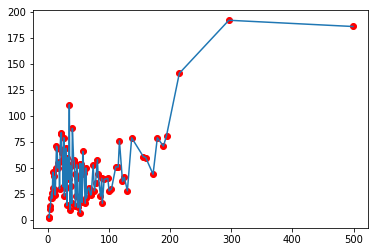

In [12]:
df_count=df.groupby('StreetName').count().reset_index()[['FID','StreetName']]
plt.scatter(df_count.StreetName,df_count.FID,color='r')
plt.plot(df_count.StreetName,df_count.FID)
plt.show()

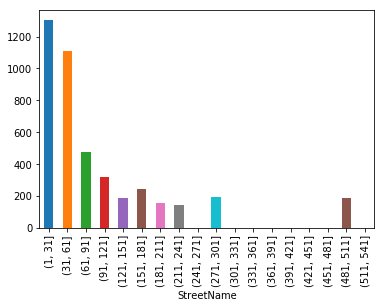

In [14]:
bins = np.arange(min(df_count.StreetName), max(df_count.StreetName) + 50, 30)
df_count_bins = df_count.groupby(pd.cut(df_count.StreetName, bins=bins)).FID.sum()
df_count_bins.plot(kind='bar')

### The CurrentValue is propotional to the SalePrice.

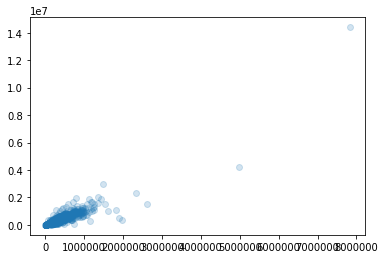

In [102]:
plt.scatter(df.CurrentValue,df.SalePrice,alpha=0.2)
z = np.polyfit(df.CurrentValue, df.SalePrice, 2)
plt.show()

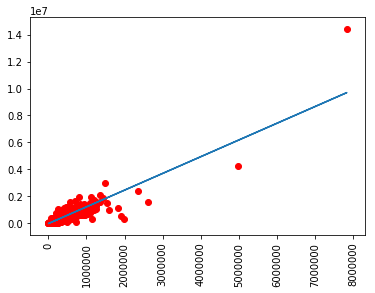

In [16]:
import numpy.polynomial.polynomial as poly
coefs = poly.polyfit(df.CurrentValue, df.SalePrice, 1)
ffit = poly.polyval(df.CurrentValue, coefs)
plt.plot(df.CurrentValue, ffit)
plt.scatter(df.CurrentValue, df.SalePrice, color='r')
plt.xticks(rotation=90)
plt.show()

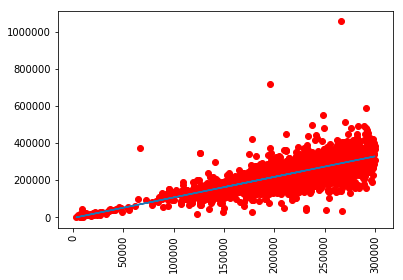

In [17]:
df_valuelessthan300thousand = df[df.CurrentValue<300000]
coefs = poly.polyfit(df_valuelessthan300thousand.CurrentValue, df_valuelessthan300thousand.SalePrice, 1)
ffit = poly.polyval(df_valuelessthan300thousand.CurrentValue, coefs)
plt.plot(df_valuelessthan300thousand.CurrentValue, ffit)
plt.scatter(df_valuelessthan300thousand.CurrentValue, df_valuelessthan300thousand.SalePrice, color='r')
plt.xticks(rotation=90)
plt.show()

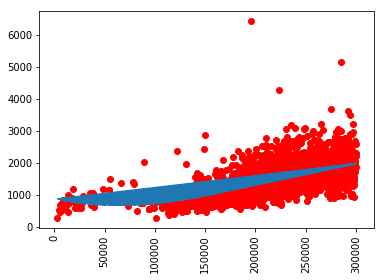

In [18]:
df_valuelessthan300thousand = df[df.CurrentValue<300000]
coefs = poly.polyfit(df_valuelessthan300thousand.CurrentValue, df_valuelessthan300thousand.FinishedArea, 3)
# Regression with a polynomial of order 3. The solution might not be unique, hence resulting in the blue region
ffit = poly.polyval(df_valuelessthan300thousand.CurrentValue, coefs)
plt.plot(df_valuelessthan300thousand.CurrentValue, ffit)
plt.scatter(df_valuelessthan300thousand.CurrentValue, df_valuelessthan300thousand.FinishedArea, color='r')
plt.xticks(rotation=90)
plt.show()

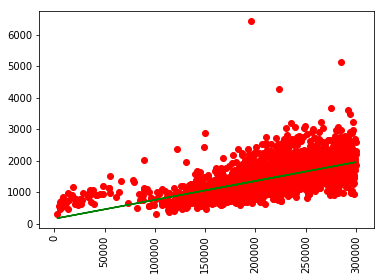

In [19]:
#df_valuelessthan300thousand = df[df.CurrentValue<300000]
plt.gcf().clear()
coefs = poly.polyfit(df_valuelessthan300thousand.CurrentValue, df_valuelessthan300thousand.FinishedArea, 1)
ffit = poly.polyval(df_valuelessthan300thousand.CurrentValue, coefs)
plt.plot(df_valuelessthan300thousand.CurrentValue, ffit,color='g')
plt.scatter(df_valuelessthan300thousand.CurrentValue, df_valuelessthan300thousand.FinishedArea, color='r')
plt.xticks(rotation=90)
plt.show()